# Lecture Sensorik - Kfz-Sensoren
*HS-Kempten FA204 © R. Aue*

## Exercise RMS  
*(s.a. rms.py)*

*RMS = Root Mean Square (dt. Effektivwert):*  
$a_{RMS} = \sqrt{1/T  \int_{0}^{T} a(t)^2 dt} $

RMS (trapezoidalRule) = 7.834429407002897
RMS (simpsonRule) = 7.8344452996137806


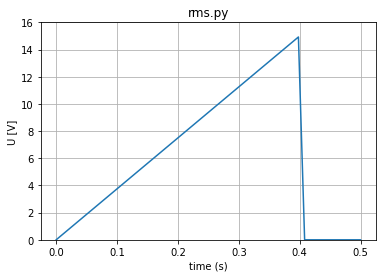

In [1]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
import math as m

# consts:
tp = 0.5 # lenght of period [s]
tstep = 0.01 # time step
tcut = 0.4 # cutoff time [s]
peak = 15 # max value of sawtooth
gradient = peak / tcut  # gradient linear function

# set up timescale with known spacing tstep (use linspace() i.o. arange() due to endpoint value)
t = np.linspace(0., tp, num= int(tp/tstep))


# compute function values:
y = gradient * t


# get length of non-zeros:
pad = tcut / tstep
# ... and set the remaining to 0:
for i in range(int(pad), len(y)):
    y[i] = 0.0
    
# expected: >>> m.sqrt(1/0.5*(15/0.4)**2 /3 * 0.4**3)= 7.745966692414835
# in case of plain - i.e. w/o cutoff - sawtooth signal => y_eff = y_peak / sqrt(3)
# trapezoidal rule:
yeff = m.sqrt((integrate.trapz(y**2, t, 0.01))/tp)
print('RMS (trapezoidalRule) = ' + str(yeff))

# simpson rule
yeff = m.sqrt((integrate.simps(y**2, t))/tp)
print('RMS (simpsonRule) = ' + str(yeff))


# plot the data
plt.plot(t,y)
plt.grid()
plt.title('rms.py')
plt.xlabel('time (s)')
plt.ylabel('U [V]')
plt.ylim(0, peak+1)

plt.show()